In [1]:
%run SAT_help_functions.ipynb
#%matplotlib inlinea

In [2]:
from statannotations.Annotator import Annotator


In [3]:
def plot_dataset_DDM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('results/DDM2v2a2terresult'+dataset+'.csv')
    df_SAT_melted = transform_df_DDM(df_SAT)


    DDMbox_pairs=[
       (("Drift Rate", "Speed"), ("Drift Rate", "Accuracy")), 
       (("Boundary Separation", "Speed"), ("Boundary Separation", "Accuracy")), 
       (("Non-decision Time", "Speed"), ("Non-decision Time", "Accuracy"))
      ]

    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"])
    ax.legend_.remove()
    #add_stat_annotation(ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
    #                    box_pairs = DDMbox_pairs, text_format='star', loc='inside', verbose=2,
    #                    comparisons_correction=comparisons_correction, test='t-test_paired')
    #ax.set_xlabel('Parameter', fontsize = 20)
    #ax.set_ylabel('Value', fontsize = 20)
    
    annotator = Annotator(ax, DDMbox_pairs, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT")
    annotator.configure(test='t-test_paired', text_format='star', loc='outside')
    annotator.apply_and_annotate()

    #if not ylabel:
    #    ax.set_ylabel(None, fontsize = 20)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", fontsize = 20)
    #ax.tick_params(axis='x', rotation=5)
    
    return ax

In [4]:
def plot_dataset_DDM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('results/DDM2v2a2terresult'+dataset+'.csv')
    df_SAT_melted = transform_df_DDM(df_SAT)

    print(df_SAT_melted)
    DDMbox_pairs=[
       (("Drift Rate", "Speed"), ("Drift Rate", "Accuracy")), 
       (("Boundary Separation", "Speed"), ("Boundary Separation", "Accuracy")), 
       (("Non-decision Time", "Speed"), ("Non-decision Time", "Accuracy"))
      ]

    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"])
    ax.legend_.remove()
    add_stat_annotation(ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
                        box_pairs = DDMbox_pairs, text_format='star', loc='inside', verbose=2,
                        comparisons_correction=comparisons_correction, test='t-test_paired')

    #if not ylabel:
    #    ax.set_ylabel(None, fontsize = 20)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", fontsize = 20)
    #ax.tick_params(axis='x', rotation=5)
    
    return ax

In [20]:
sns.__version__

'0.13.2'

In [6]:
def transform_df_OUM(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time", "Self-excitation"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed", "Self-excitation Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy", "Self-excitation Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], 
                        value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted

In [7]:
def transform_df_DDM(df_SAT):
    
    params = ["Drift Rate", "Boundary Separation", "Non-decision Time"]

    df_SAT1 = df_SAT[["Drift Rate Speed", "Boundary Separation Speed", "Non-decision Time Speed"]]
    df_SAT1 = pd.DataFrame(np.array(df_SAT1), columns = params)
    df_SAT1["SAT"] = ["Speed"]*len(df_SAT1)

    df_SAT2 = df_SAT[["Drift Rate Accuracy", "Boundary Separation Accuracy", "Non-decision Time Accuracy"]]
    df_SAT2 = pd.DataFrame(np.array(df_SAT2), columns = params)
    df_SAT2["SAT"] = ["Accuracy"]*len(df_SAT2)
    df_SAT = pd.concat((df_SAT1,df_SAT2))
    df_SAT_melted = pd.melt(df_SAT, id_vars = ["SAT"], 
                        value_vars=params,
                        var_name = "Parameter", value_name = "Value")
    return df_SAT_melted

          SAT          Parameter     Value
0       Speed         Drift Rate  1.017783
1       Speed         Drift Rate  0.267459
2       Speed         Drift Rate  1.522607
3       Speed         Drift Rate  0.167063
4       Speed         Drift Rate  0.870129
..        ...                ...       ...
115  Accuracy  Non-decision Time  0.307799
116  Accuracy  Non-decision Time  0.365524
117  Accuracy  Non-decision Time  0.345614
118  Accuracy  Non-decision Time  0.302564
119  Accuracy  Non-decision Time  0.314207

[120 rows x 3 columns]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=4.252e-06 stat=-6.894e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.042e-02 stat=-3.336e+00
Non-decision Time_Speed v.s.

<Axes: title={'center': 'Dutilh (2019)'}>

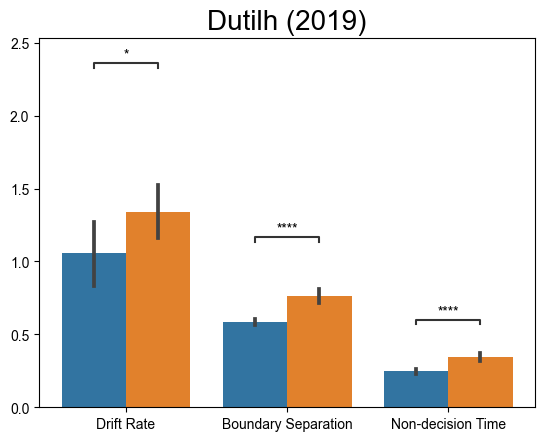

In [8]:
plot_dataset_DDM(dataset = "Dutilh2019", dataset_name = "Dutilh2019")

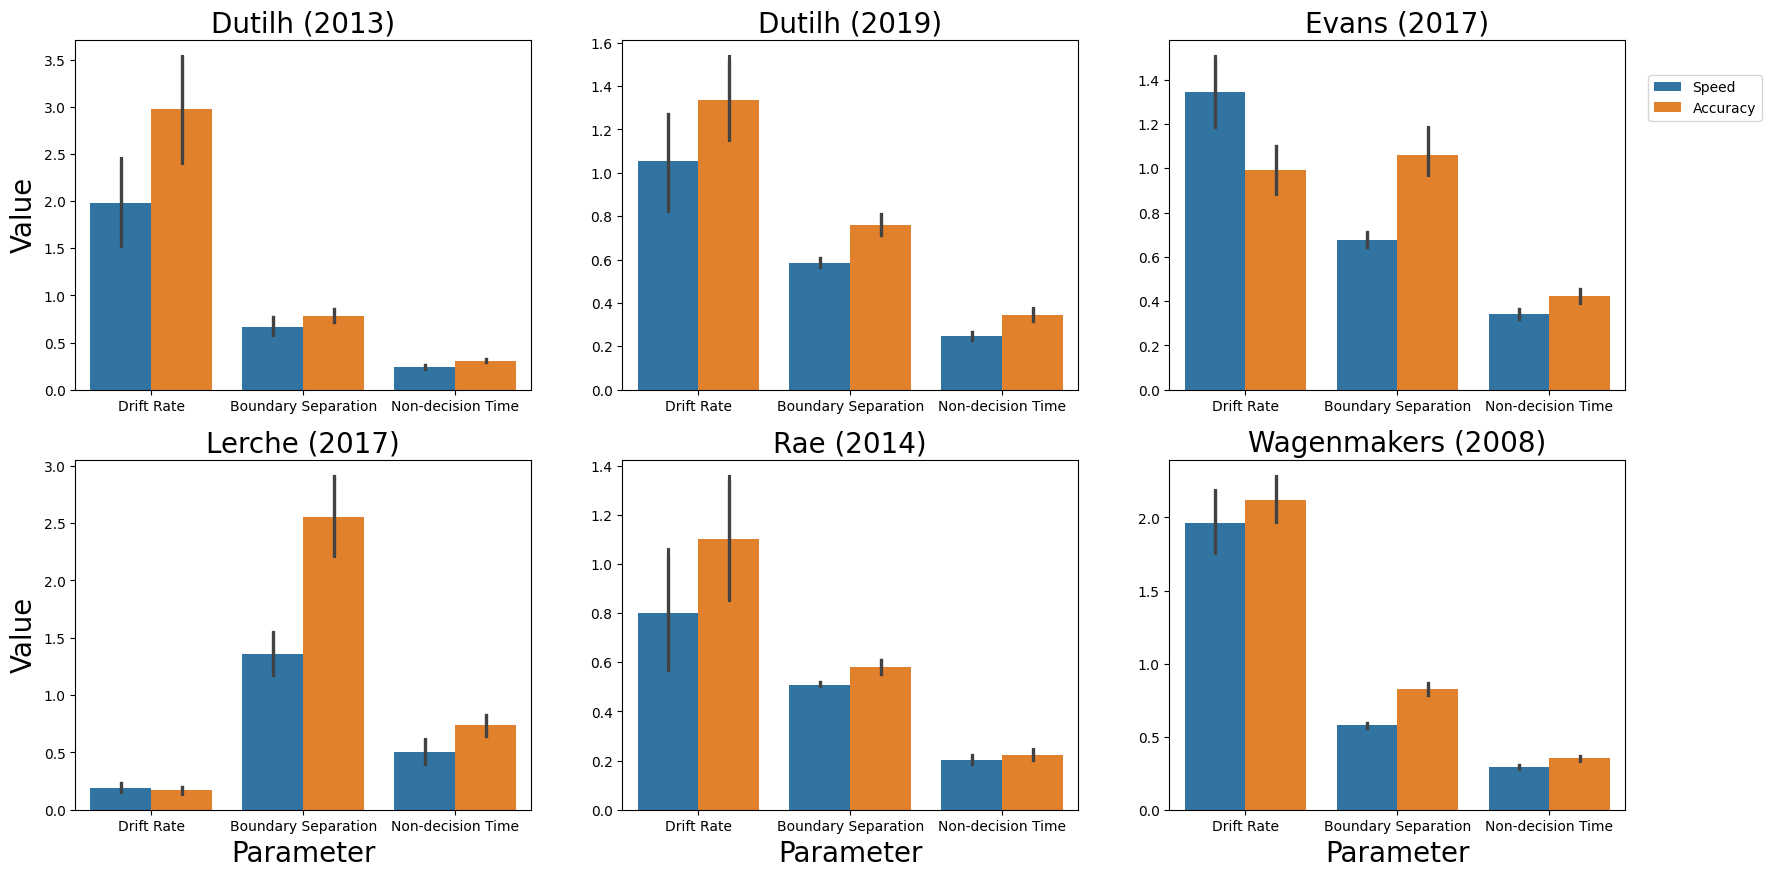

In [163]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(2,3,figsize=(20, 10))
for i in range(3):
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    
    
for i in range(3,6):
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

axes[1,0].set_xlabel('Parameter', fontsize = 20)
axes[1,1].set_xlabel('Parameter', fontsize = 20)
axes[1,2].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)


# When creating the legend, only use the first two elements
handles, labels = axes[0,2].get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.)

plt.show()

In [160]:
def plot_dataset_OUM(dataset, dataset_name, ax=None, comparisons_correction = "bonferroni"):
    if ax is None:
        ax = plt.gca()
    df_SAT = pd.read_csv('results/OUMfullresult'+dataset+'.csv')
    df_SAT_melted = transform_df_OUM(df_SAT)


    #DDMbox_pairs=[
    #   (("Drift Rate", "Speed"), ("Drift Rate", "Accuracy")), 
    #   (("Boundary Separation", "Speed"), ("Boundary Separation", "Accuracy")), 
    #   (("Non-decision Time", "Speed"), ("Non-decision Time", "Accuracy"))
    #  ]

    #print(df_SAT_melted)
    sns.barplot(ax = ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"])
    ax.legend_.remove()
    #add_stat_annotation(ax, data=df_SAT_melted, x="Parameter", y="Value", hue="SAT", hue_order=["Speed","Accuracy"],
    #                    box_pairs = DDMbox_pairs, text_format='star', loc='inside', verbose=2,
    #                    comparisons_correction=comparisons_correction, test='t-test_paired')
    #ax.set_xlabel('Parameter', fontsize = 20)
    #ax.set_ylabel('Value', fontsize = 20)

    #if not ylabel:
    #    ax.set_ylabel(None, fontsize = 20)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_title(dataset_name[:-4] + " "+"("+dataset_name[-4:] + ")", fontsize = 20)
    
    return ax

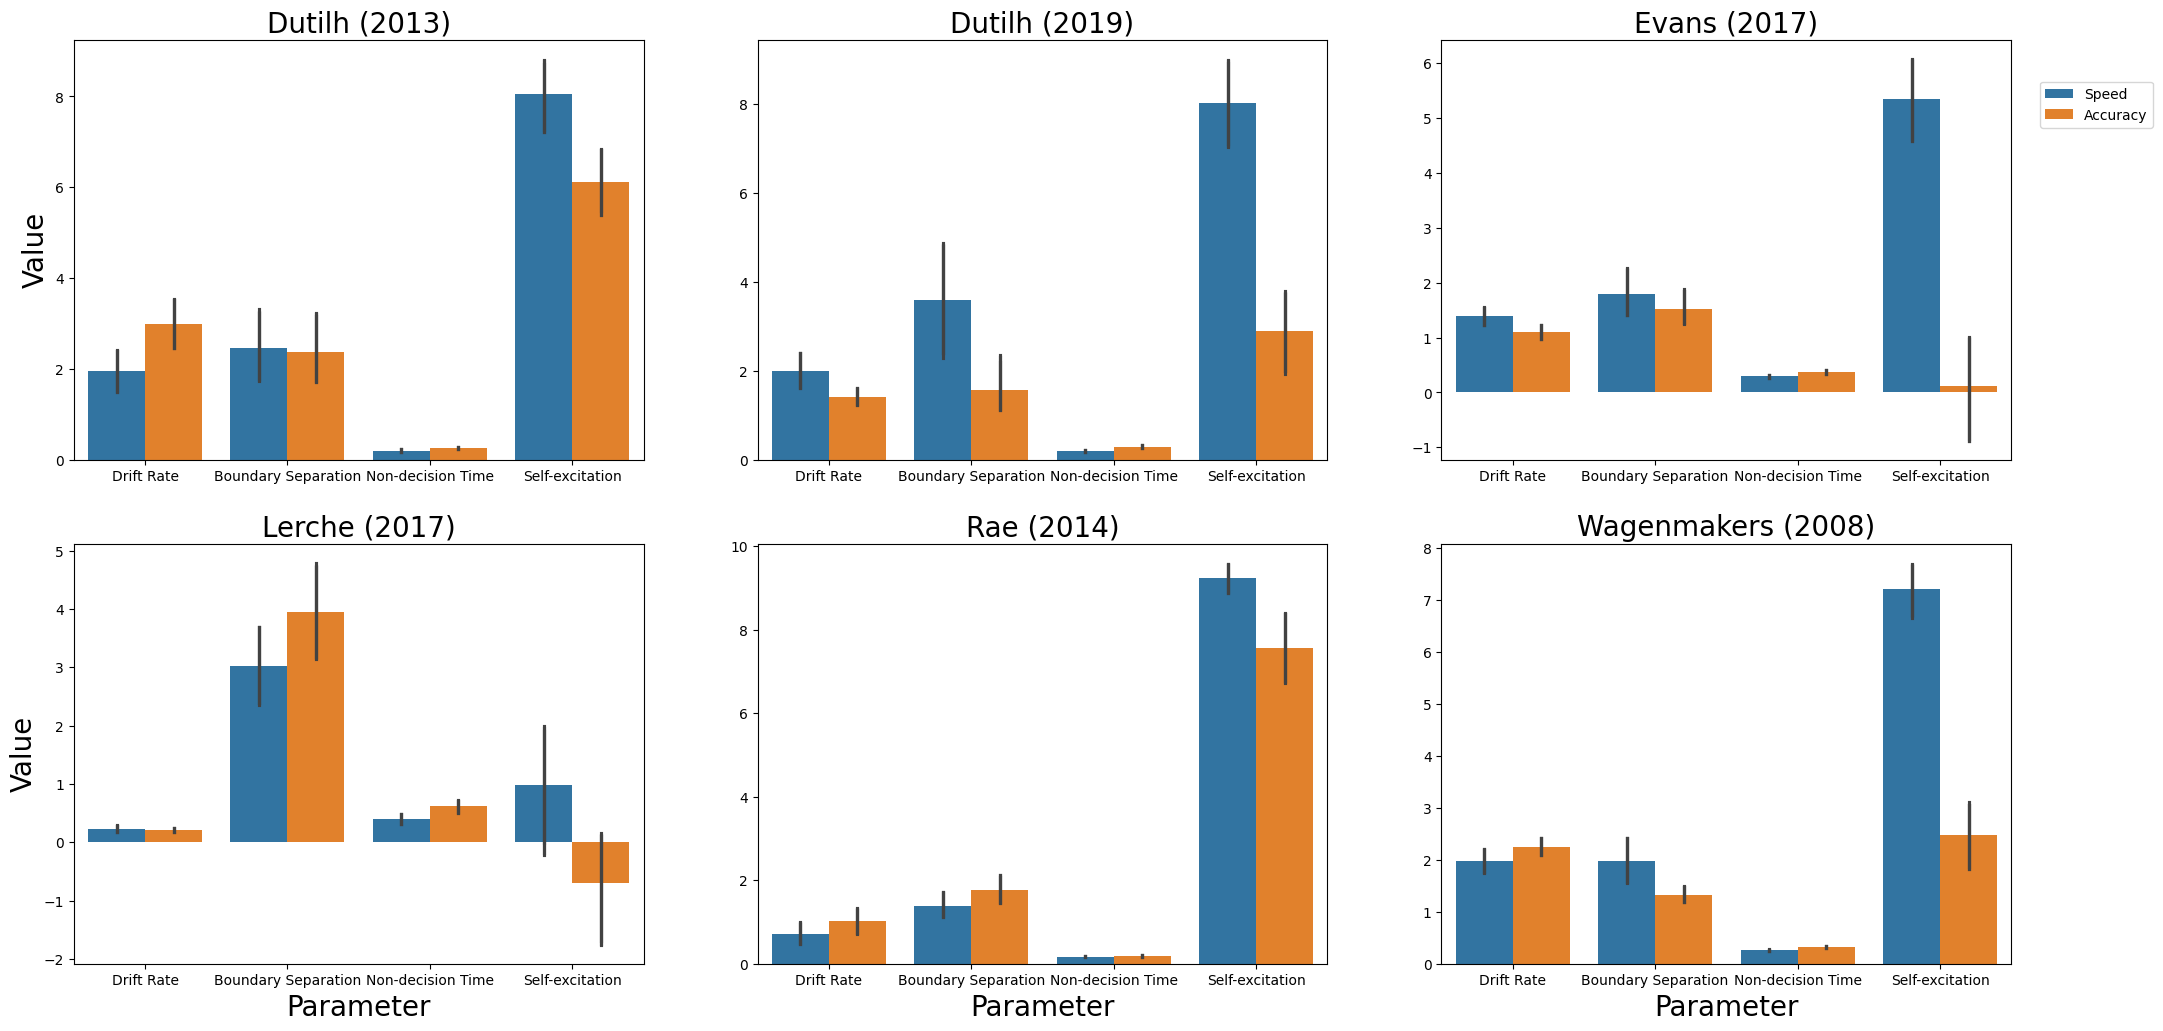

In [161]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

fig, axes = plt.subplots(2,3,figsize=(25, 12))
for i in range(3):
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[0,i])
    
    
for i in range(3,6):
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[1,i-3])

axes[1,0].set_xlabel('Parameter', fontsize = 20)
axes[1,1].set_xlabel('Parameter', fontsize = 20)
axes[1,2].set_xlabel('Parameter', fontsize = 20)

axes[0,0].set_ylabel('Value', fontsize = 20)
axes[1,0].set_ylabel('Value', fontsize = 20)


# When creating the legend, only use the first two elements
handles, labels = axes[0,2].get_legend_handles_labels()
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 2.1), loc=2, borderaxespad=0.)

plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=5.968e-04 stat=-4.719e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.546e-02 stat=-3.288e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.819e-06 stat=-7.472e+00
Self-excitation_Speed v.s. Self-excitation_Accuracy: t-test paired samples with Bonferroni correction, P_val=6.200e-01 stat=1.481e+00


<AxesSubplot:xlabel='Parameter'>

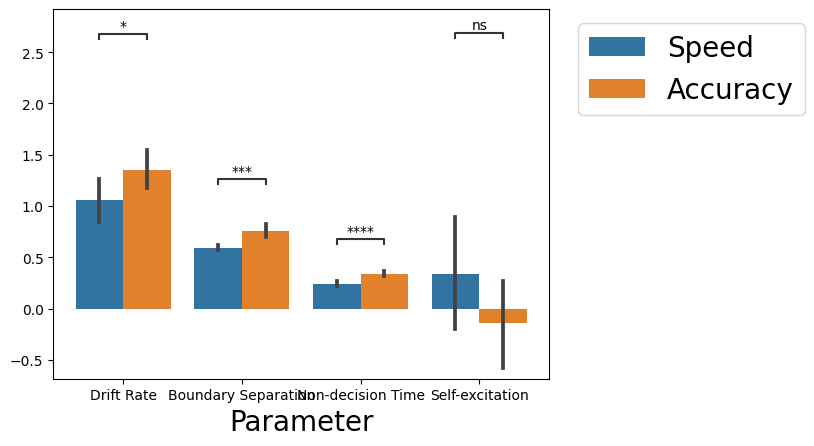

In [85]:
plot_dataset_DDMOUM(dataset = "Dutilh2019", dataset_name = "Dutilh2019")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.402e-06 stat=-7.182e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.140e-02 stat=-3.296e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.054e-06 stat=-7.607e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.250e-01 stat=1.841e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.782e-04 stat=-4.922e+0

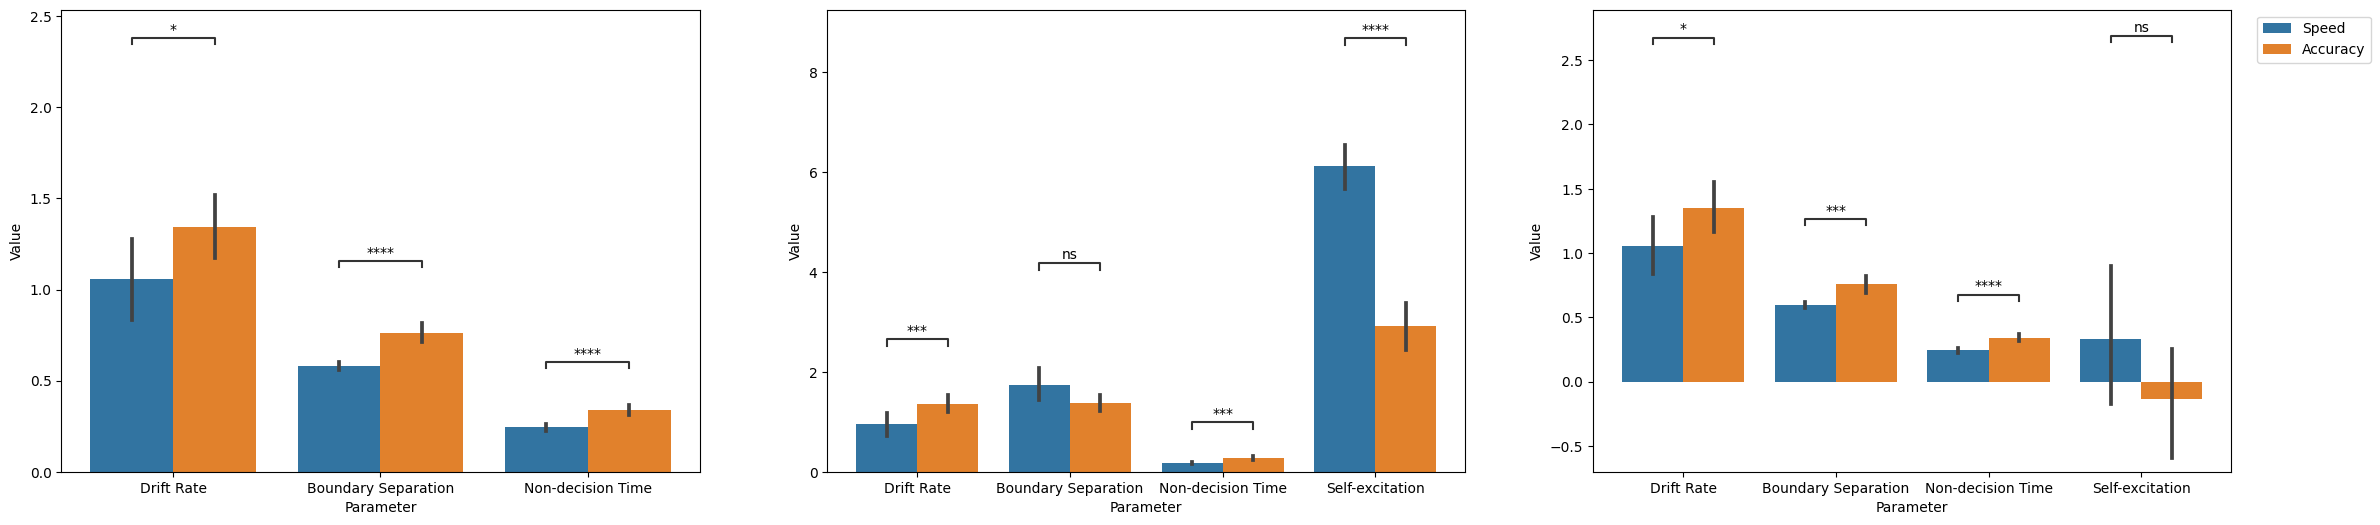

In [9]:
plot_dataset(dataset = "Dutilh2019")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.400e-01 stat=-2.072e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.588e-04 stat=-4.398e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.431e-04 stat=-4.535e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.975e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.374e-04 stat=-4.521e+0

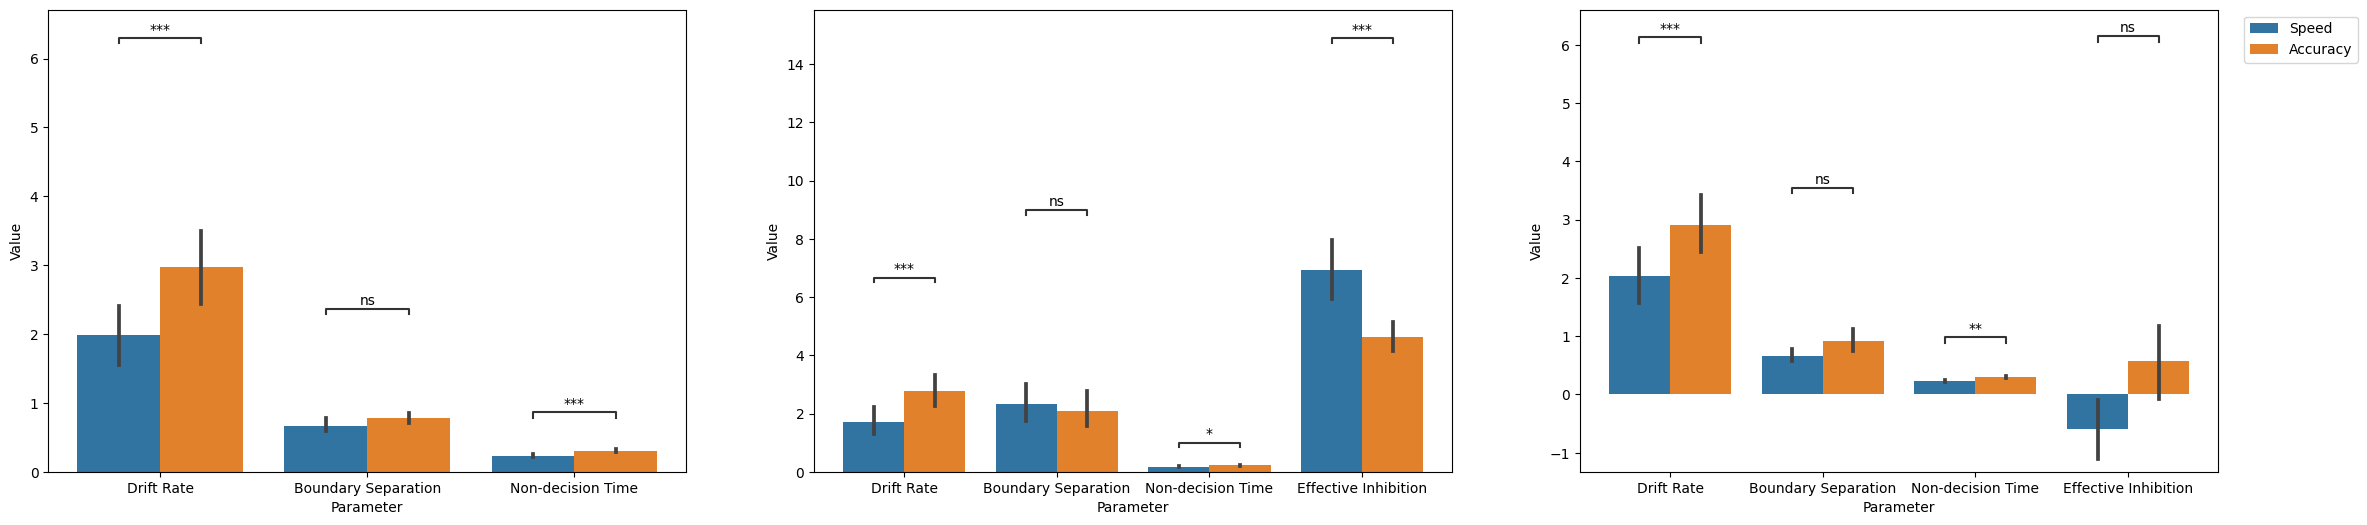

In [32]:
plot_dataset(dataset = "Dutilh2013")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=6.699e-06 stat=-5.405e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.320e-04 stat=4.340e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=9.150e-08 stat=-6.651e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=9.843e-01 stat=-1.175e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.219e-01 stat=1.965e+00

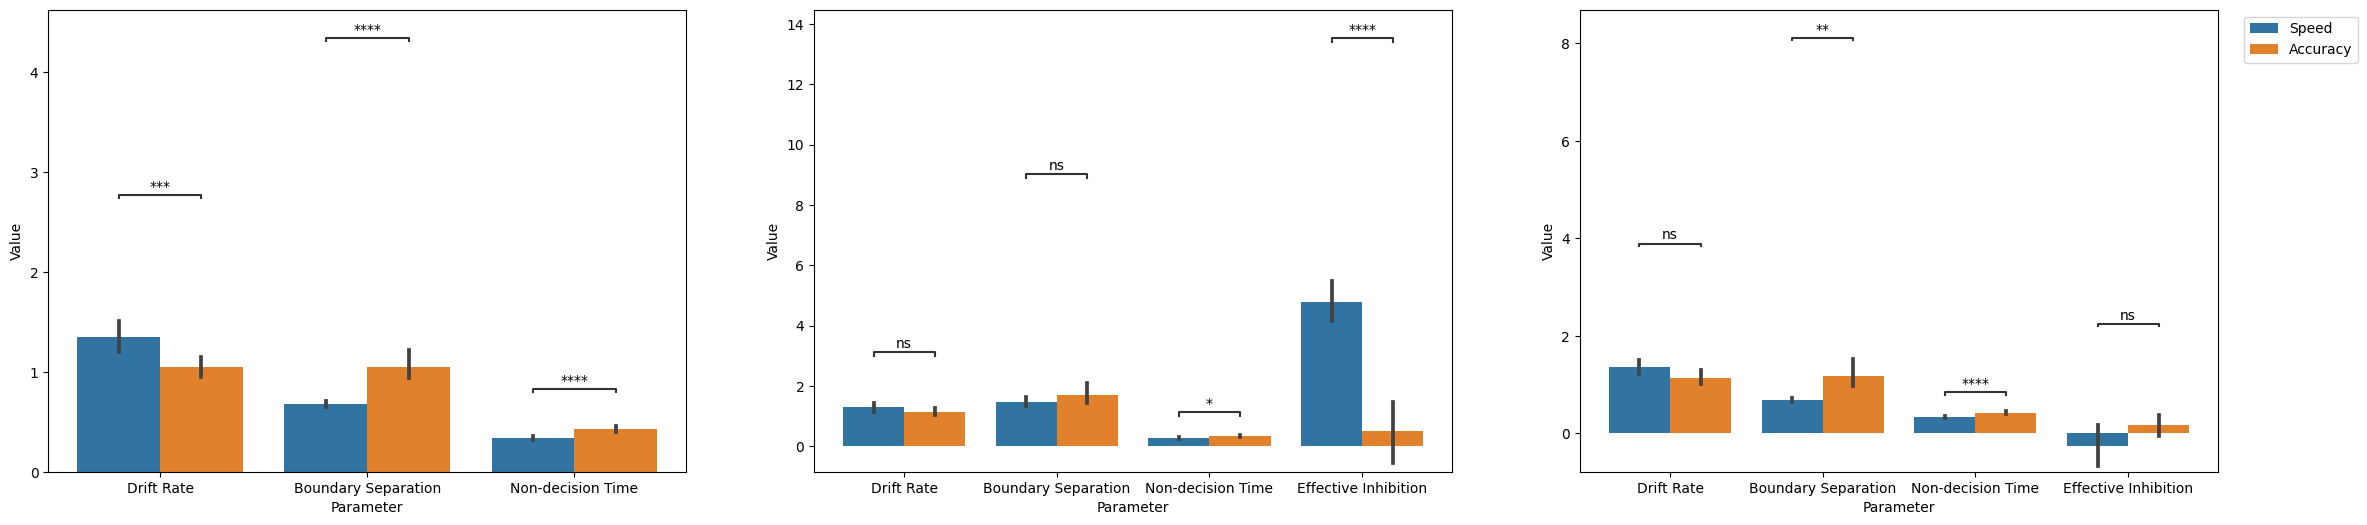

In [42]:
plot_dataset(dataset = "Evans2017")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=8.100e-16 stat=-9.900e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=7.176e-03 stat=-3.120e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=4.387e-11 stat=-7.673e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=8.214e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=6.361e-05 stat=-4.549e+0

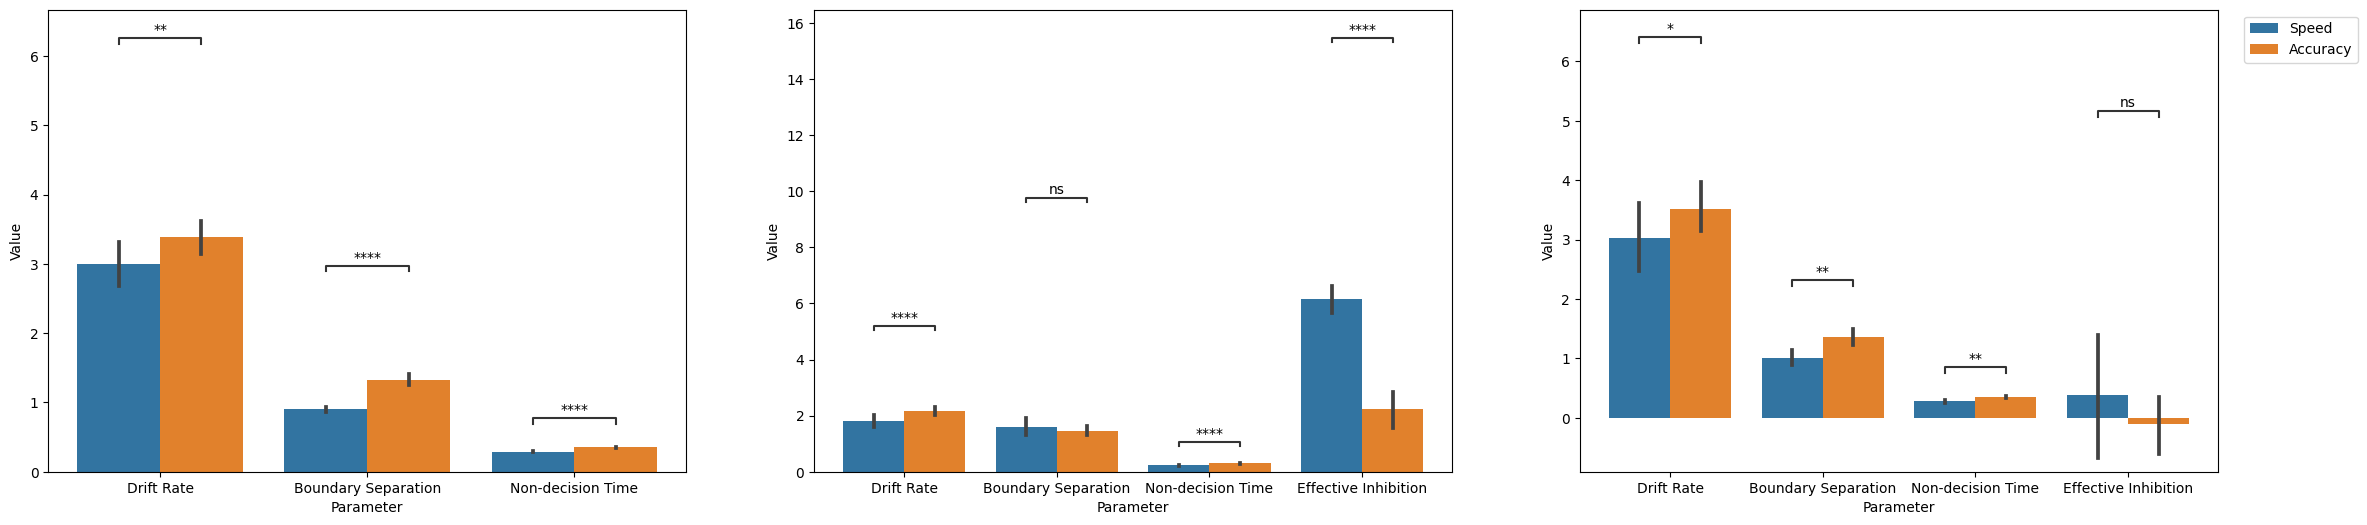

In [38]:
plot_dataset(dataset = "EJ2008")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.803e-06 stat=-6.011e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=7.769e-08 stat=-7.248e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.599e-03 stat=-3.837e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.976e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=7.909e-07 stat=-6.542e+0

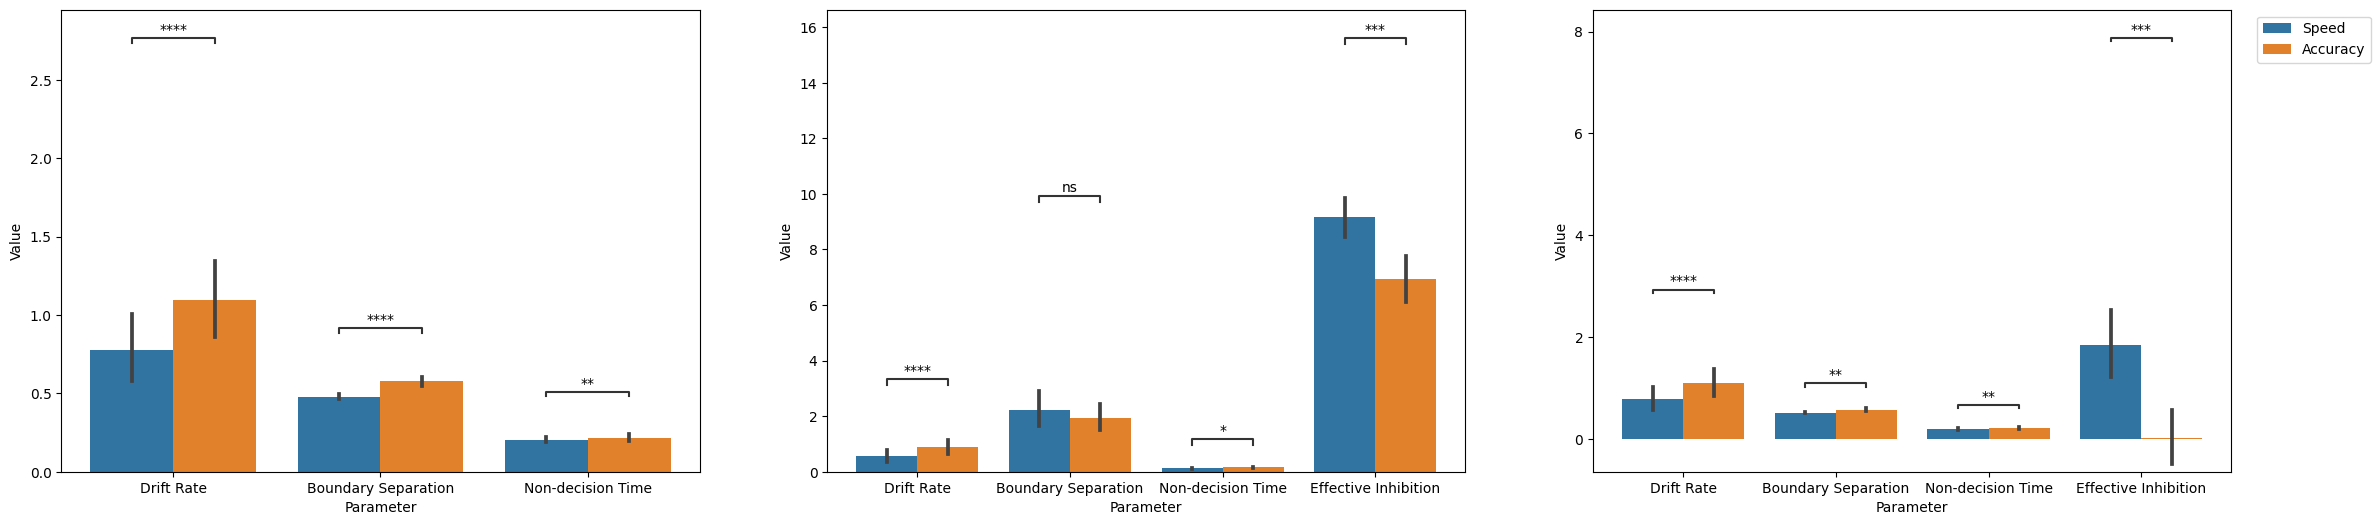

In [41]:
plot_dataset(dataset = "Rae2014")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=8.830e-08 stat=-6.988e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=8.304e-01 stat=1.104e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.517e-05 stat=-5.060e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.616e-05 stat=-5.144e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=6.096e-01

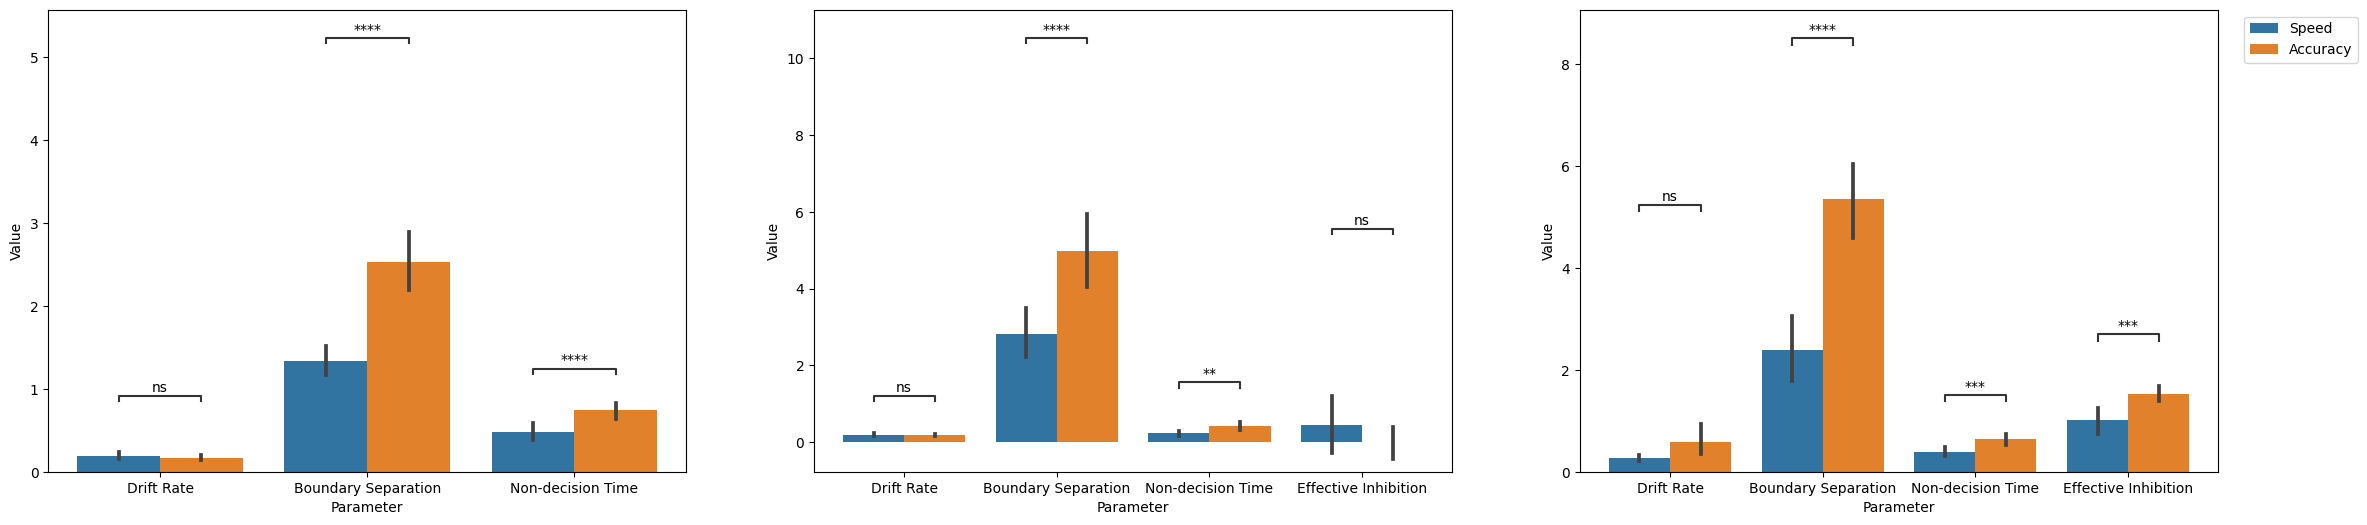

In [31]:
plot_dataset(dataset = "Lerche2017")

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.402e-06 stat=-7.182e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.140e-02 stat=-3.296e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.054e-06 stat=-7.607e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.250e-01 stat=1.841e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.782e-04 stat=-4.922e+0

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.976e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=7.909e-07 stat=-6.542e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.959e-02 stat=-2.737e+00
Self-excitation_Speed v.s. Self-excitation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.158e-04 stat=4.847e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.098e-03 stat=

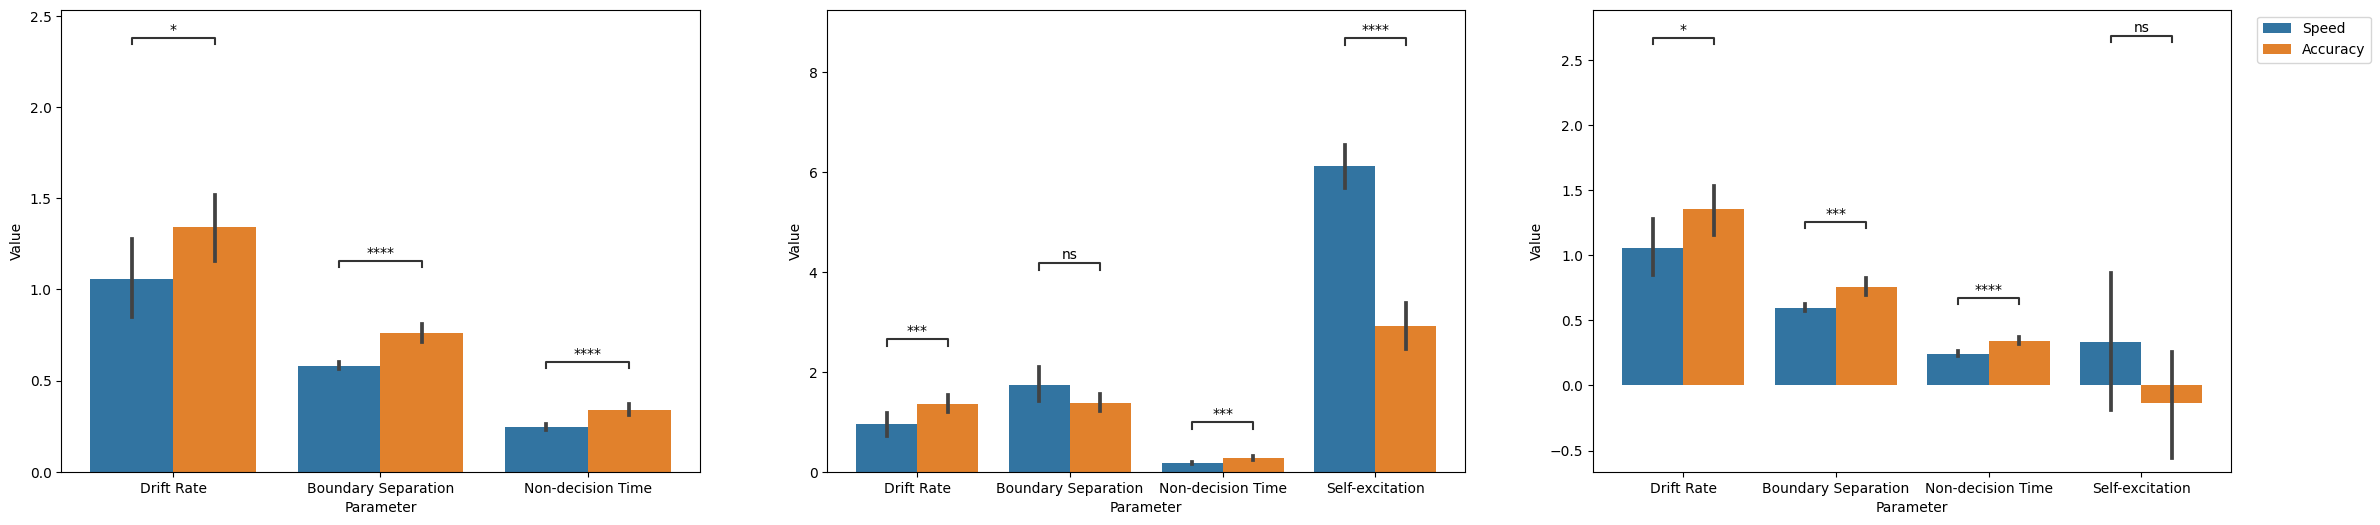

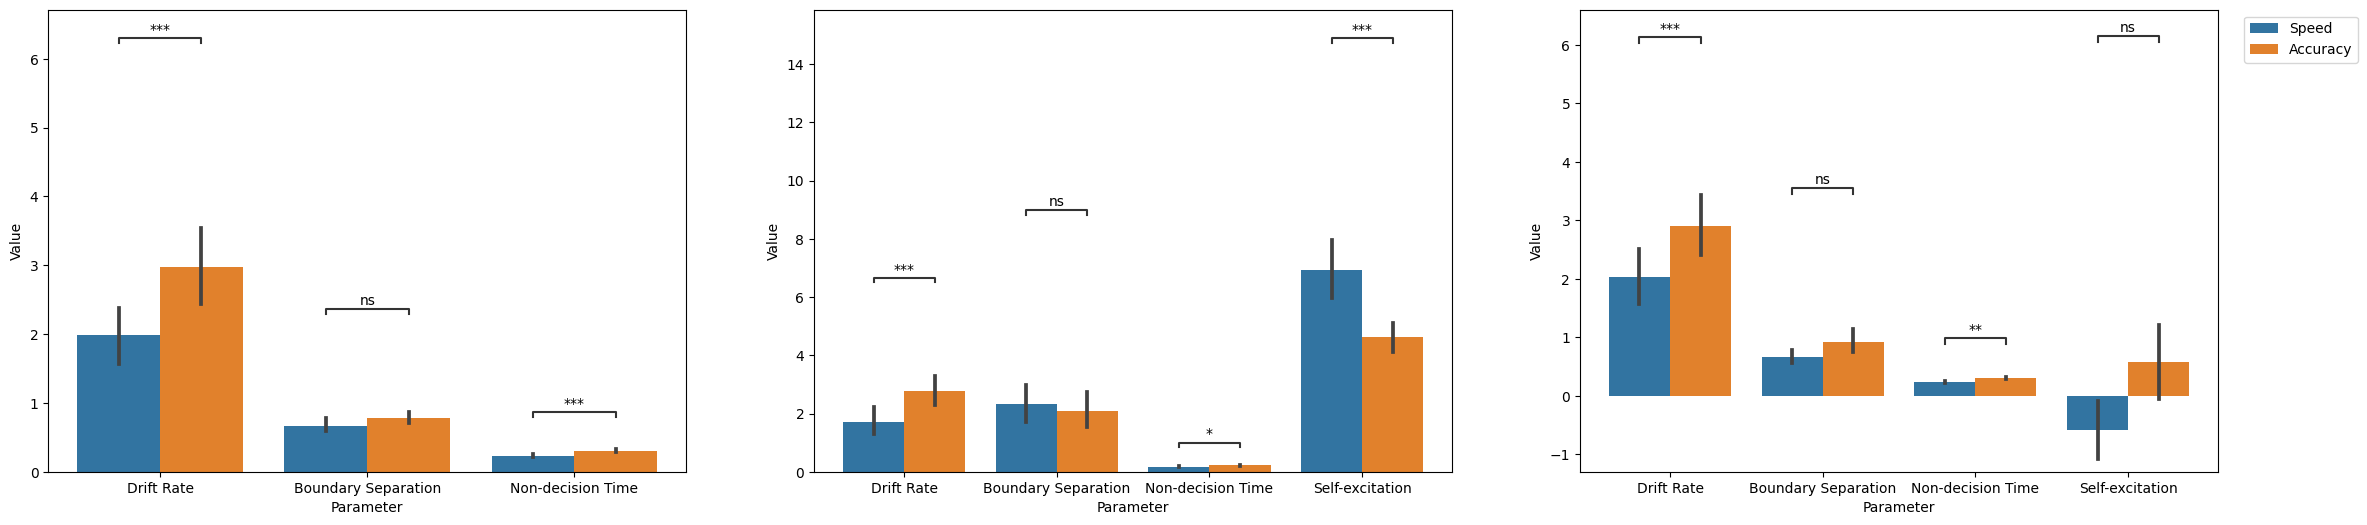

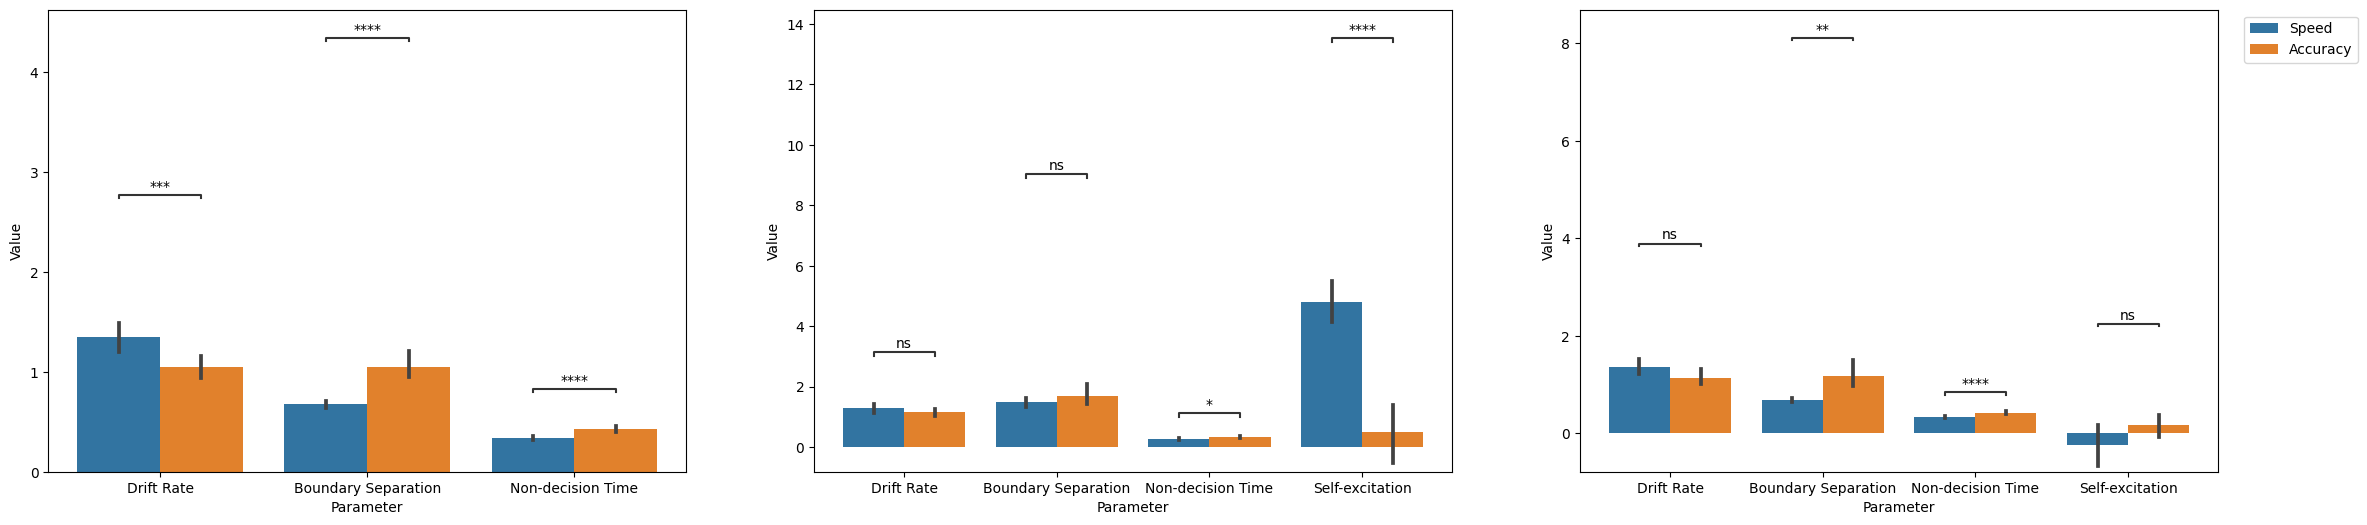

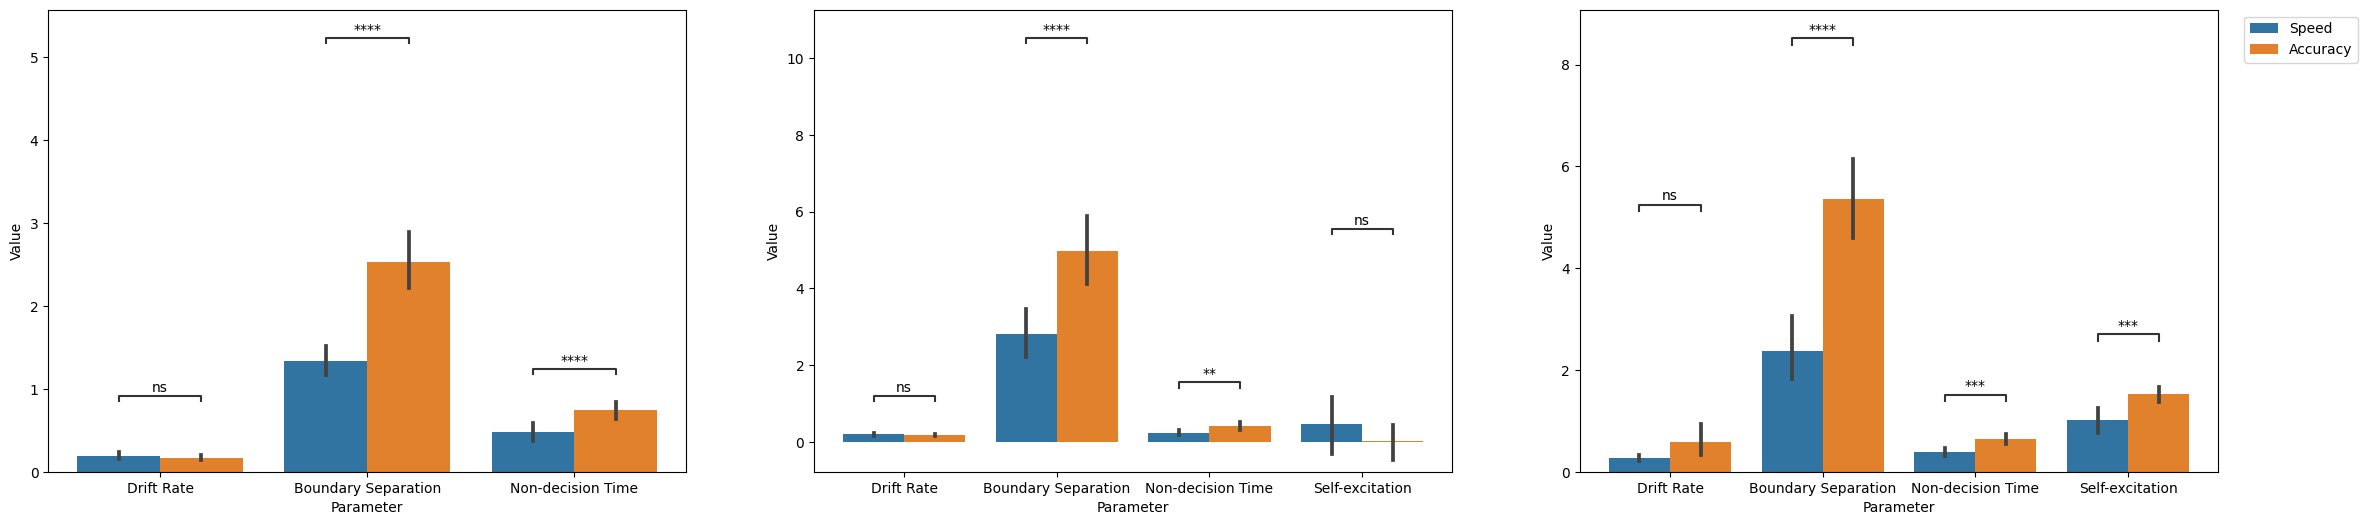

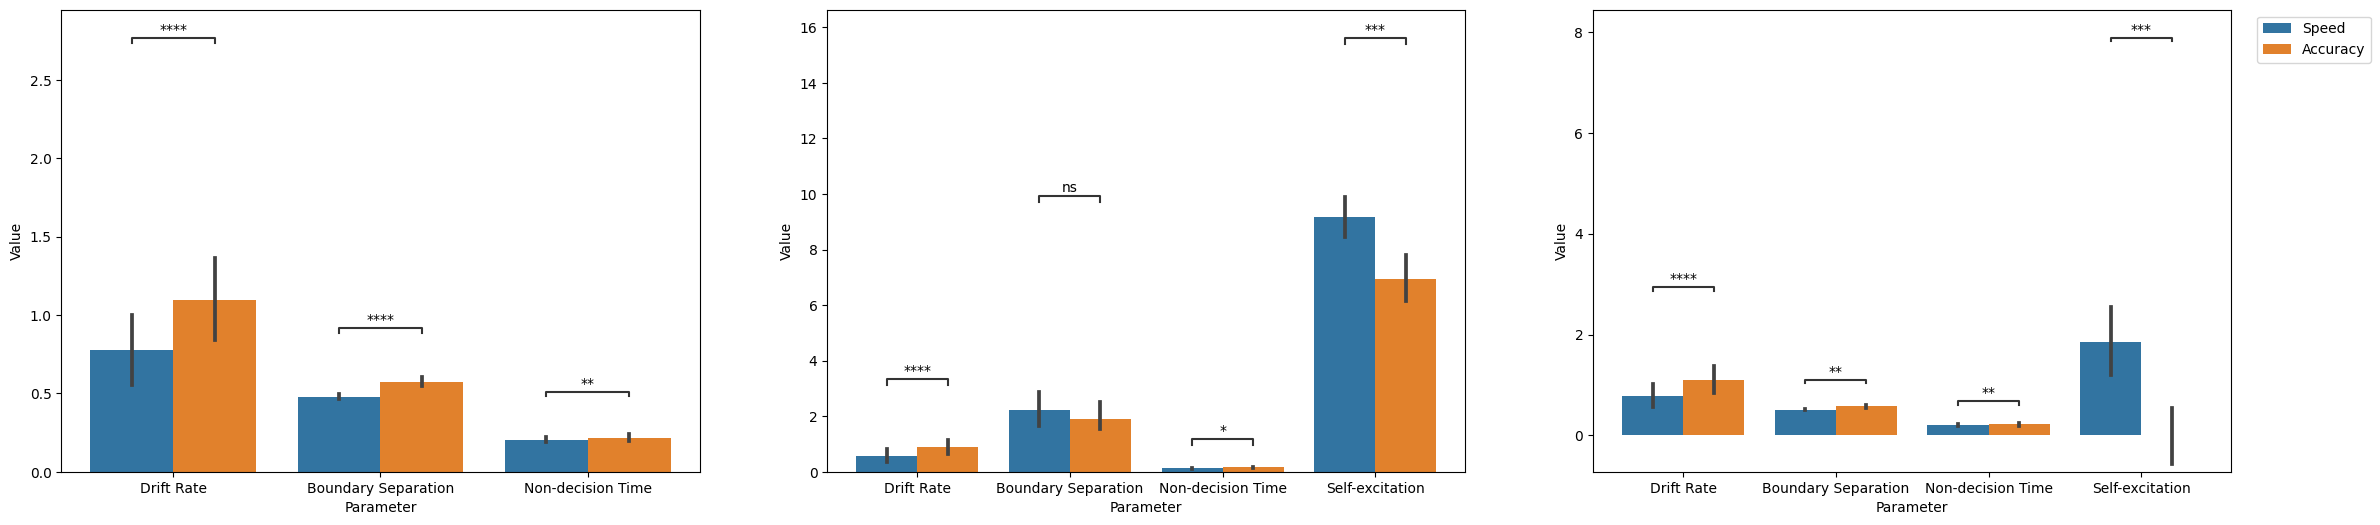

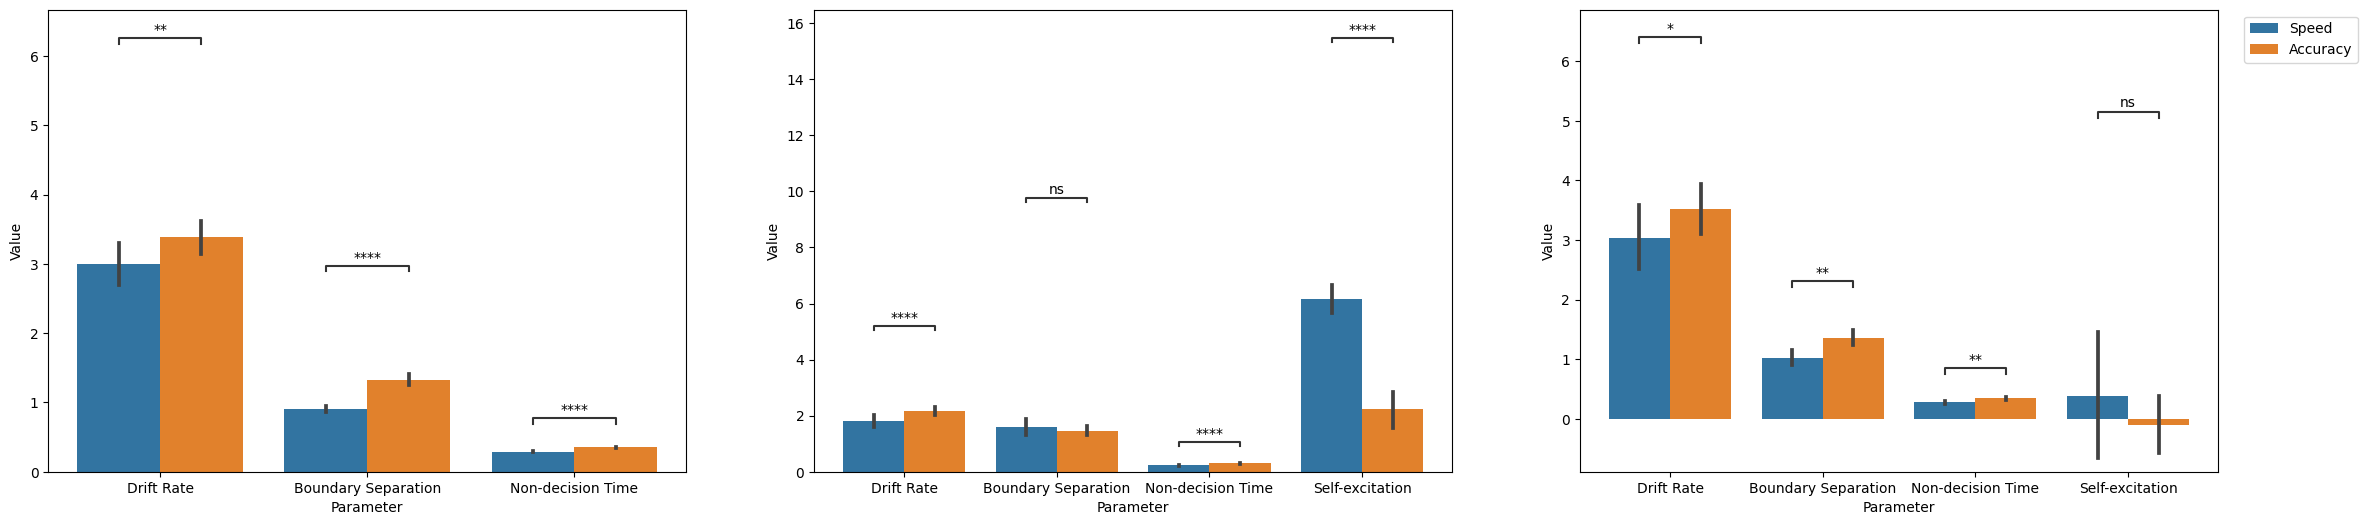

In [11]:
plot_dataset(dataset = "Dutilh2019")
plot_dataset(dataset = "Dutilh2013")
plot_dataset(dataset = "Evans2017")
plot_dataset(dataset = "Rae2014")
plot_dataset(dataset = "Lerche2017")
plot_dataset(dataset = "EJ2008")

In [71]:
datasets = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'EJ2008']
dataset_names = ['Dutilh2013', 'Dutilh2019', 'Evans2017', 'Lerche2017', 'Rae2014', 'Wagenmakers2008']

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.400e-01 stat=-2.072e+00
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.588e-04 stat=-4.398e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=2.431e-04 stat=-4.535e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=4.975e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.374e-04 stat=-4.521e+0

Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.599e-03 stat=-3.837e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Boundary Separation_Speed v.s. Boundary Separation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.000e+00 stat=9.976e-01
Drift Rate_Speed v.s. Drift Rate_Accuracy: t-test paired samples with Bonferroni correction, P_val=7.909e-07 stat=-6.542e+00
Non-decision Time_Speed v.s. Non-decision Time_Accuracy: t-test paired samples with Bonferroni correction, P_val=3.959e-02 stat=-2.737e+00
Self-excitation_Speed v.s. Self-excitation_Accuracy: t-test paired samples with Bonferroni correction, P_val=1.158e-04 stat=4.847e+00
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.0

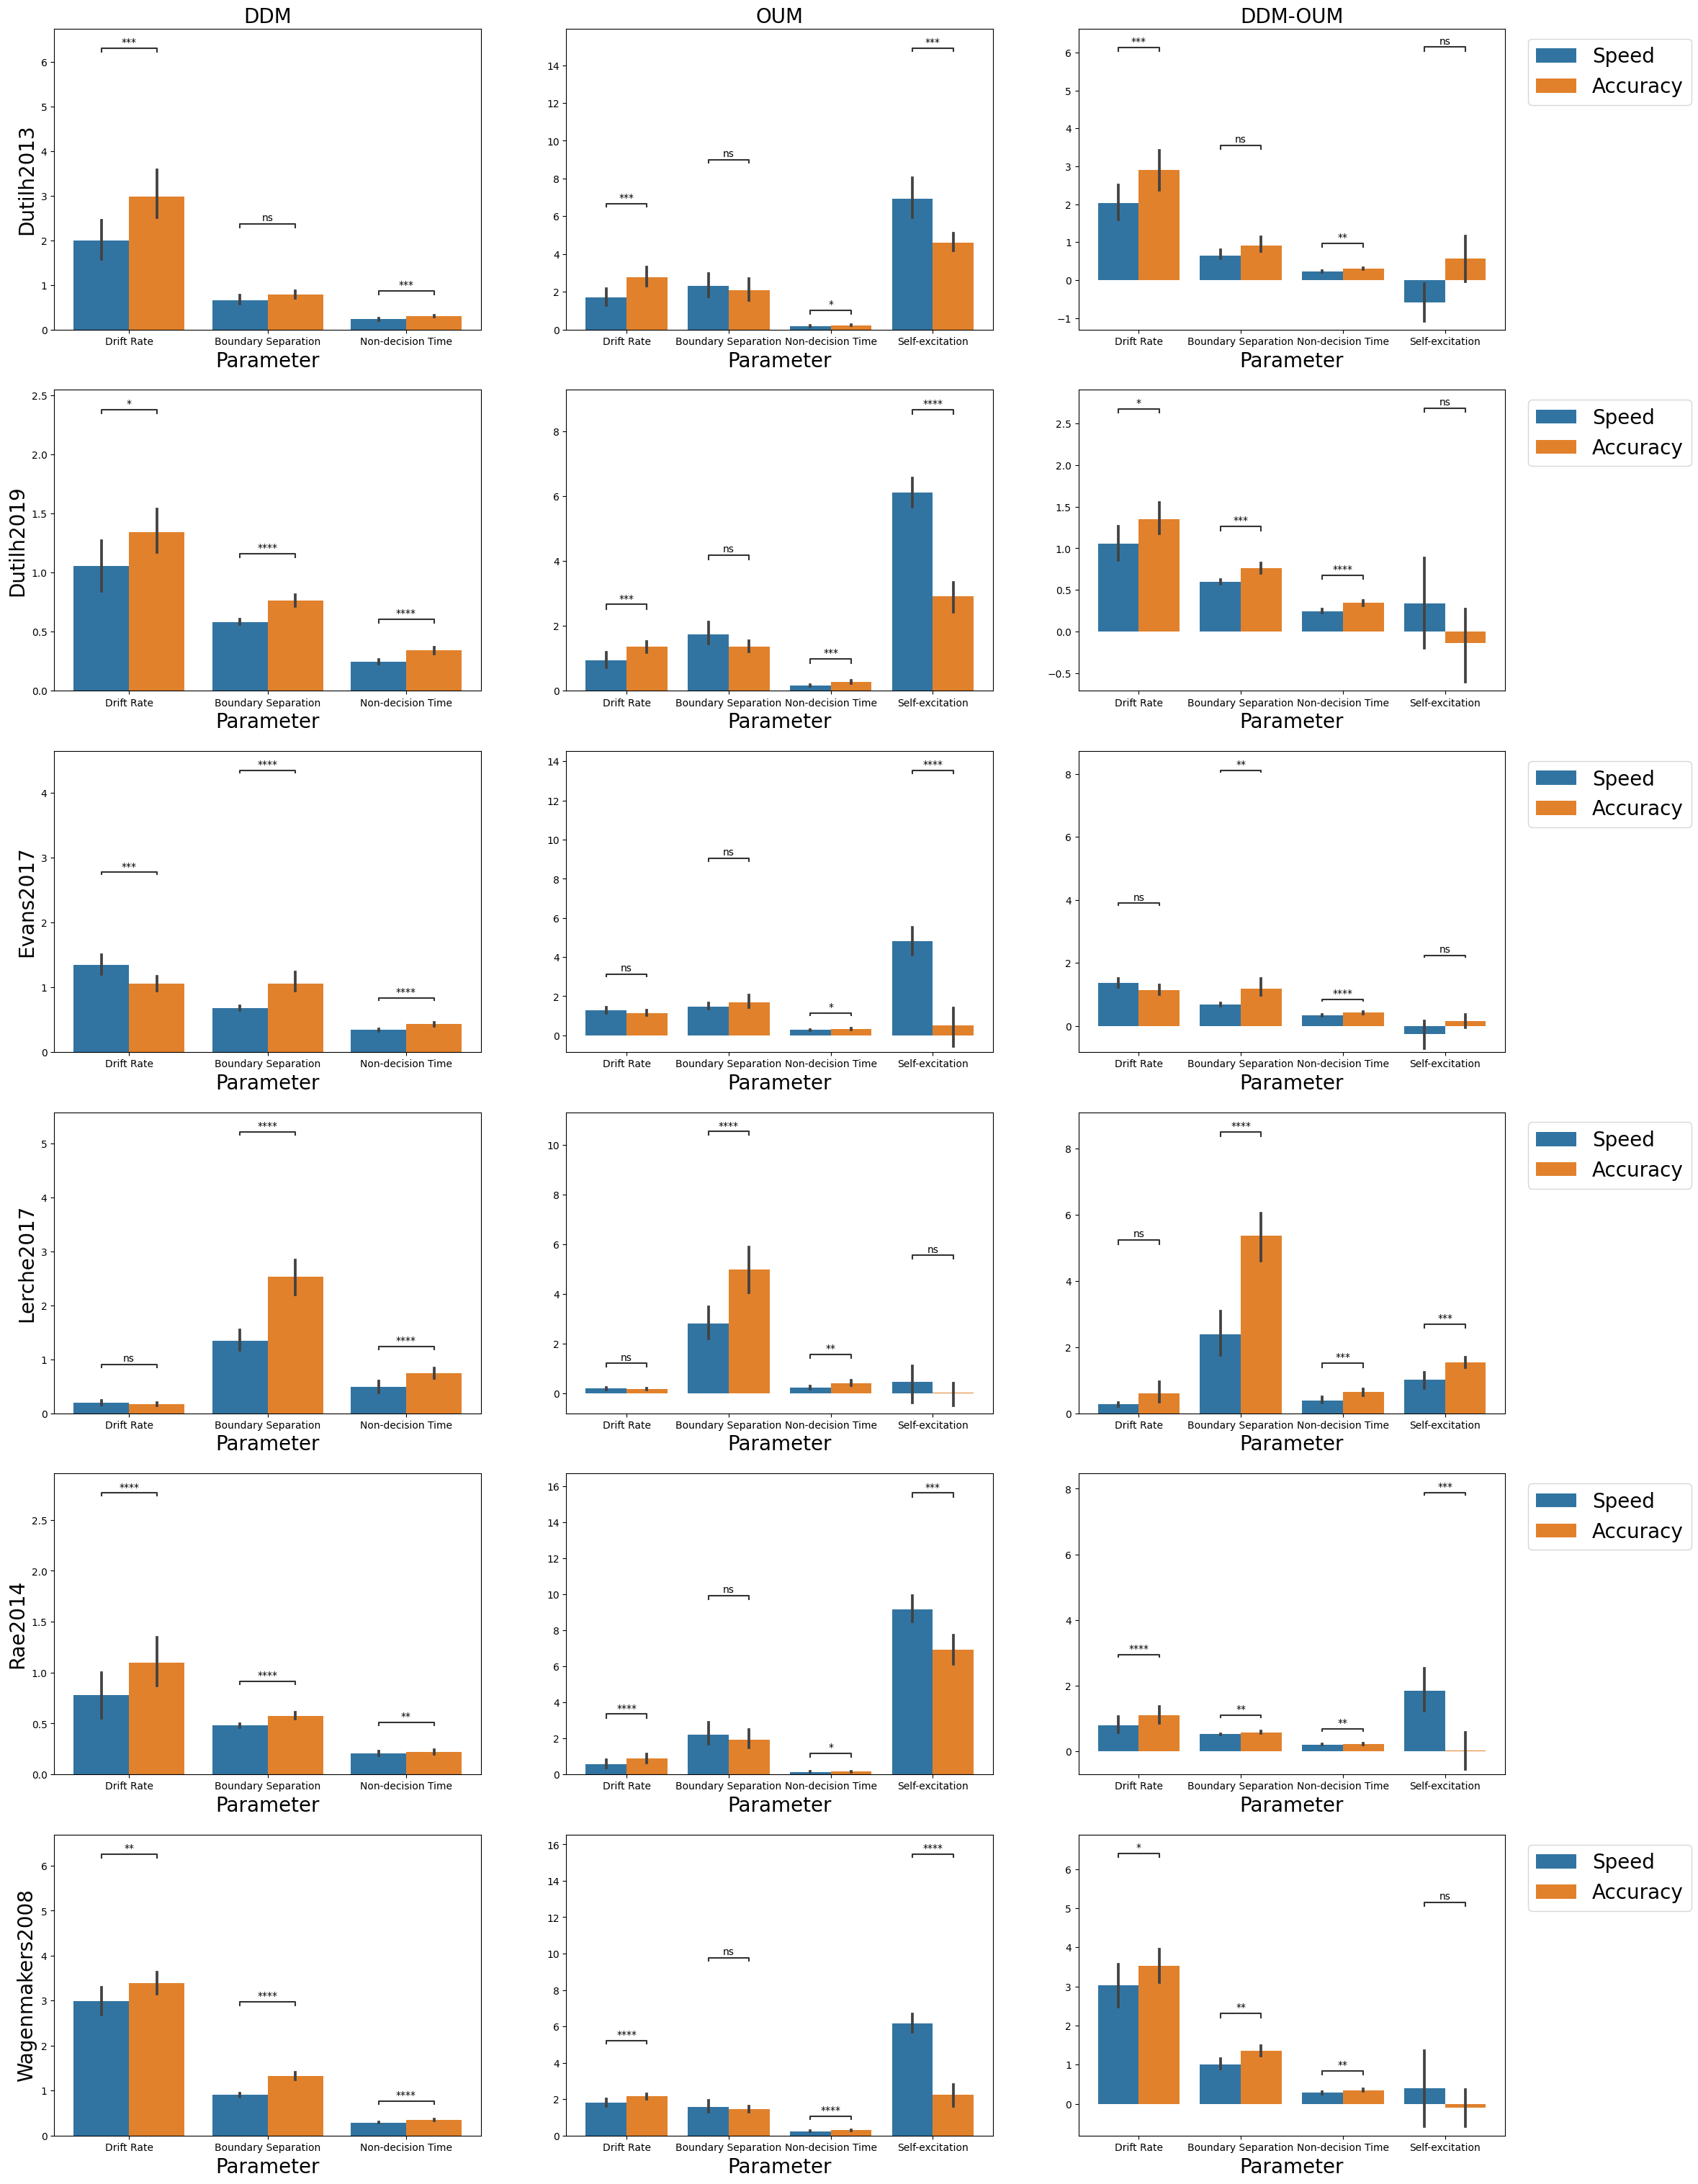

In [86]:
fig, axes = plt.subplots(6,3,figsize=(26, 38))
for i in range(6):
    plot_dataset_DDM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[i,0])
    plot_dataset_OUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[i,1])
    plot_dataset_DDMOUM(dataset = datasets[i], dataset_name = dataset_names[i], ax=axes[i,2])

axes[0,0].set_title("DDM", size = 20)
axes[0,1].set_title("OUM", size = 20)
axes[0,2].set_title("DDM-OUM", size = 20)

plt.show()